# Importing the necessary libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jibin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Loading dataset

In [3]:
# Get the base directory of the project
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Construct the correct path to the dataset
file_path = os.path.join(base_dir, 'dataset', 'iphone.csv')

# Basic analysis


In [14]:
print("Dataset information:")
df = pd.read_csv(file_path)
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   productAsin                3062 non-null   object 
 1   country                    3062 non-null   object 
 2   date                       1165 non-null   object 
 3   isVerified                 3062 non-null   bool   
 4   ratingScore                3062 non-null   int64  
 5   reviewTitle                3062 non-null   object 
 6   reviewDescription          2976 non-null   object 
 7   reviewUrl                  3046 non-null   object 
 8   reviewedIn                 3062 non-null   object 
 9   variant                    3062 non-null   object 
 10  variantAsin                3062 non-null   object 
 11  cleaned_reviewDescription  2963 non-null   object 
 12  sentiment                  3062 non-null   object 
 13  sentiment_vader            

In [15]:
# Display the first 5 rows of the dataset
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,...,cleaned_reviewDescription,sentiment,sentiment_vader,sentiment_textblob,sentiment_bert,confidence,sentiment_bert_v2,confidence_mapped,sentiment_bert_v1,sentiment_score
0,B09G9BL5CP,India,2024-11-08,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,...,every thing good iphones theres nothing compar...,Positive,Neutral,Positive,negative,0.370163,negative,0.370163,very negative,-1
1,B09G9BL5CP,India,NaN,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,...,look fabulous android user switched apple perf...,Positive,Positive,Positive,positive,0.570423,positive,0.570423,very positive,1
2,B09G9BL5CP,India,NaN,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,...,tried flip camera recording facility added pau...,Negative,Positive,Negative,negative,0.512503,negative,0.512503,very negative,-1
3,B09G9BL5CP,India,NaN,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,...,100 genuine,Neutral,Neutral,Positive,positive,0.854994,positive,0.854994,very positive,1
4,B09G9BL5CP,India,NaN,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,...,happy get iphone 13 amazon offer,Positive,Positive,Positive,positive,0.640400,positive,0.640400,very positive,1


In [16]:
# Display the number of unique values for each column
df.nunique()

productAsin                     7
country                         7
date                          302
isVerified                      2
ratingScore                     5
reviewTitle                  2018
reviewDescription            2297
reviewUrl                    2460
reviewedIn                   1255
variant                        86
variantAsin                    99
cleaned_reviewDescription    2238
sentiment                       3
sentiment_vader                 3
sentiment_textblob              3
sentiment_bert                  3
confidence                   2234
sentiment_bert_v2               3
confidence_mapped            2234
sentiment_bert_v1               5
sentiment_score                 3
dtype: int64

In [11]:
# Display the number of missing values for each column
df.isnull().sum()


productAsin                     0
country                         0
date                         1897
isVerified                      0
ratingScore                     0
reviewTitle                     0
reviewDescription              86
reviewUrl                      16
reviewedIn                      0
variant                         0
variantAsin                     0
cleaned_reviewDescription       0
sentiment_vader                 0
sentiment_textblob              0
sentiment_bert                  0
confidence                      0
sentiment_bert_v2               0
confidence_mapped               0
sentiment_bert_v1               0
sentiment_score                 0
dtype: int64

In [12]:
print("Statistical information:")
df.describe()


Statistical information:


,ratingScore,confidence,confidence_mapped,sentiment_score
count,3062.000000,3062.000000,3062.000000,3062.000000
mean,3.758981,0.550534,0.550534,0.314827
std,1.579033,0.192153,0.192153,0.904182
min,1.000000,0.220566,0.220566,-1.000000
25%,3.000000,0.397243,0.397243,-1.000000
50%,5.000000,0.512132,0.512132,1.000000
75%,5.000000,0.717943,0.717943,1.000000
max,5.000000,0.982598,0.982598,1.000000


# Detailed Data Analysis


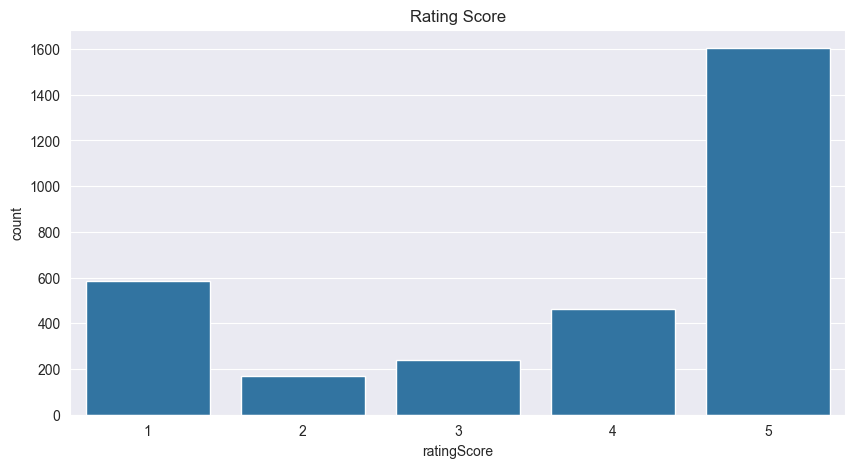

In [8]:
# using matplotlib for visualization

# visualise the field ratingScore
# visualise each score with different color

plt.figure(figsize=(10,5))
sns.countplot(x='ratingScore', data=df)
plt.title('Rating Score')
plt.show()


In [9]:
# checking amount of data available for each country

data_per_country = df.groupby('country').size()
print(data_per_country)

country
Canada                     4
Egypt                      1
India                   2229
Japan                    158
Mexico                    11
United Arab Emirates      80
United States            579
dtype: int64


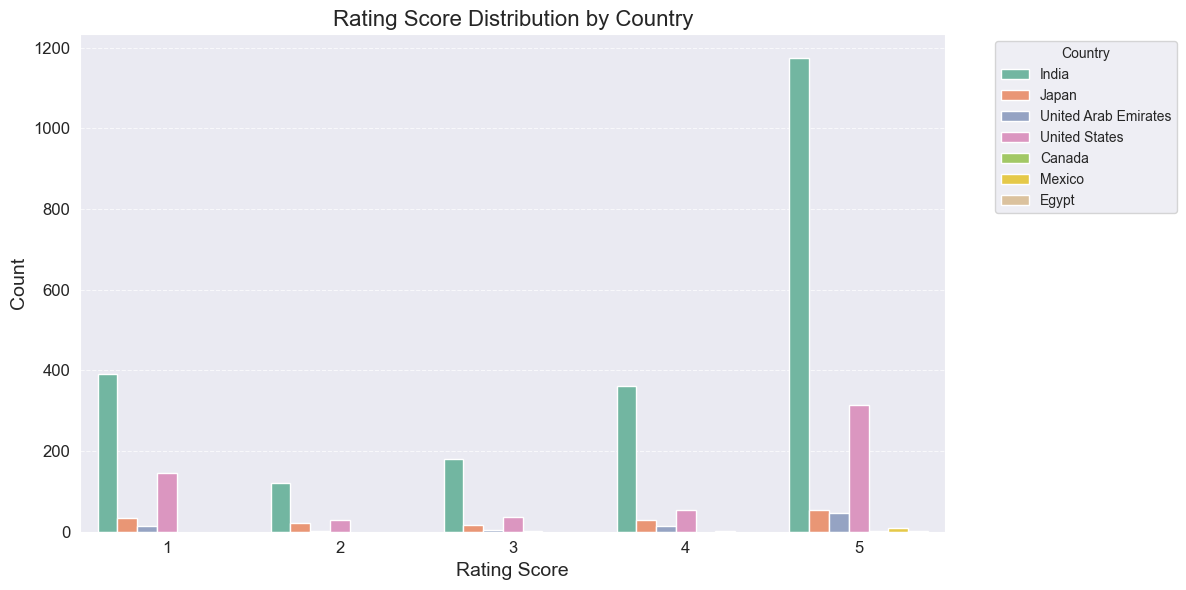

In [10]:
# visualise the distribution of ratingScore for each country

plt.figure(figsize=(12, 6))
sns.countplot(x='ratingScore', hue='country', data=df, palette='Set2')
plt.title('Rating Score Distribution by Country', fontsize=16)
plt.xlabel('Rating Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Data Preprocessing and cleaning


In [11]:
# importing the necessary libraries to clean the text data
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download
#from textblob import TextBlob
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Download necessary NLTK resources
download('punkt')  # Tokenizer
download('stopwords')  # Stopwords
download('wordnet')  # Lemmatizer


# cleaning the text for reviewdescription
# Fill missing descriptions with empty strings
df['reviewDescription'] = df['reviewDescription'].fillna("")

# Remove special characters, numbers, and emojis
def clean_text(text):
    # convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove special characters, numbers, and punctuation
    #text = re.sub(r'[^a-z\s]', '', text)
    # change it because it is not removing the numbers and it is important for our data
    # text = re.sub(r'\W', ' ', text)  # Remove special characters
    # Remove special characters but keep emojis
    text = re.sub(r'[^\w\s\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', '', text)
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    # Remove emojis
    #text = emoji.replace_emoji(text, replace="")
    # we realised that the emojis are important for the sentiment analysis so we are not removing them anymore
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    #we decided not to lemmatize the words, because we realised that it was not giving the correct words
    # Lemmatize tokens
    #lemmatizer = WordNetLemmatizer()
    #tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # for example, words like ios will be lemmatized to io which is not correct
    
    # Join tokens back to a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

#function for correcting the spelling mistakes
#def correct_spelling(text):
 #   return str(TextBlob(text).correct())
 # comment out the above function as it takes a lot of time to run!
#we realised that the spelling mistakes are not that much in the data so we can ignore this function


# Apply the cleaning function to the reviewDescription column
df['cleaned_reviewDescription'] = df['reviewDescription'].apply(clean_text)

# Save the cleaned dataset for further processing
cleaned_file_path = os.path.join(base_dir, 'dataset', 'iphone.csv')
df.to_csv(cleaned_file_path, index=False)

print("Data cleaning completed. Cleaned data saved to:", cleaned_file_path)

# Example of before and after cleaning
print("Original Description:", df['reviewDescription'][0])
print("Cleaned Description:", df['cleaned_reviewDescription'][0])

# Tokenization and Text Representation
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_reviewDescription'])
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
# Get the feature names (the words corresponding to the columns of the TF-IDF matrix)
features = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array and take the mean of each feature
mean_tfidf = tfidf_matrix.mean(axis=0).A1

# Combine the words with their mean TF-IDF scores
word_scores = zip(features, mean_tfidf)
sorted_words = sorted(word_scores, key=lambda x: x[1], reverse=True)

# Print top 10 words with highest mean TF-IDF score
for word, score in sorted_words[:10]:
    print(f"{word}: {score}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jibin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jibin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jibin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data cleaning completed. Cleaned data saved to: C:\Users\jibin\PycharmProjects\SentimentAnalysis_CustomerReviews\dataset\iphone.csv
Original Description: Every thing is good about iPhones, there's nothing compared to it's speed and ios but i was disappointed because there's no charger for it even though Indian judiciary told them to provide , still they haven't made any progress regarding charger. Why should we spend 62k and more than that for iPhones because of it's brand and Acessories comfort size and Features right if that's not there what's point of buying an iPhone.Thank you🙏
Cleaned Description: every thing good iphones theres nothing compared speed ios disappointed theres charger even though indian judiciary told provide still havent made progress regarding charger spend 62k iphones brand acessories comfort size features right thats whats point buying iphonethank you🙏
TF-IDF Matrix Shape: (3062, 5000)
good: 0.06323389157078879
phone: 0.04998810623829323
product: 0.0359597199769

# Word Cloud


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

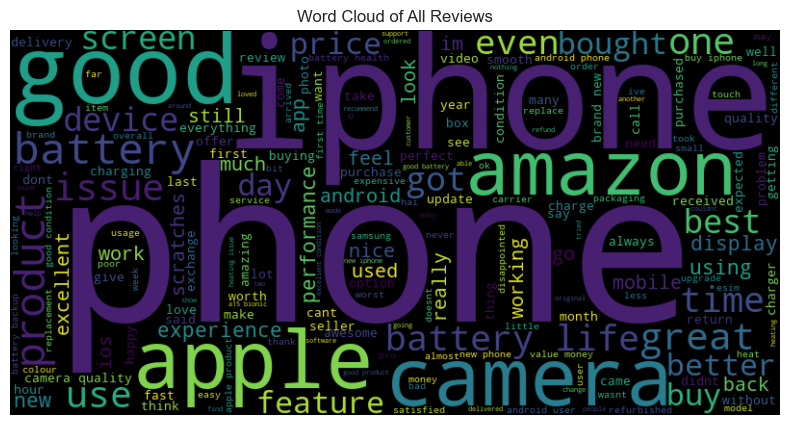

In [13]:
# Generate Word Cloud for all reviews
all_text = ' '.join(review for review in df['cleaned_reviewDescription'])
wordcloud = WordCloud(width=800, height=400, random_state=42).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Reviews')
plt.show()

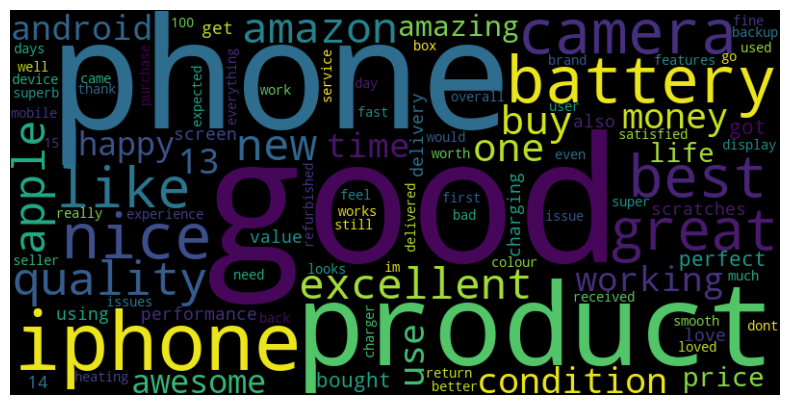

In [14]:
# Create a word cloud from the top words
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(sorted_words[:100]))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Analysis
## using Vader Sentiment Analysis


sentiment_vader
Positive    2126
Neutral      511
Negative     425
Name: count, dtype: int64


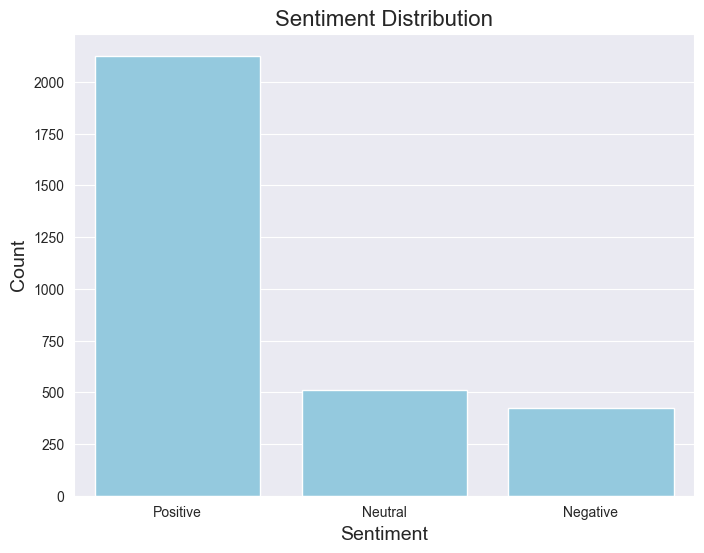

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyser
analyzer = SentimentIntensityAnalyzer()

#Function to get the sentiment score
# Function to classify sentiments
def classify_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
# Apply the function to the cleaned reviewDescription column
df['sentiment_vader'] = df['cleaned_reviewDescription'].apply(classify_sentiment)

#Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment_vader'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, color='skyblue')  # Use a single color
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

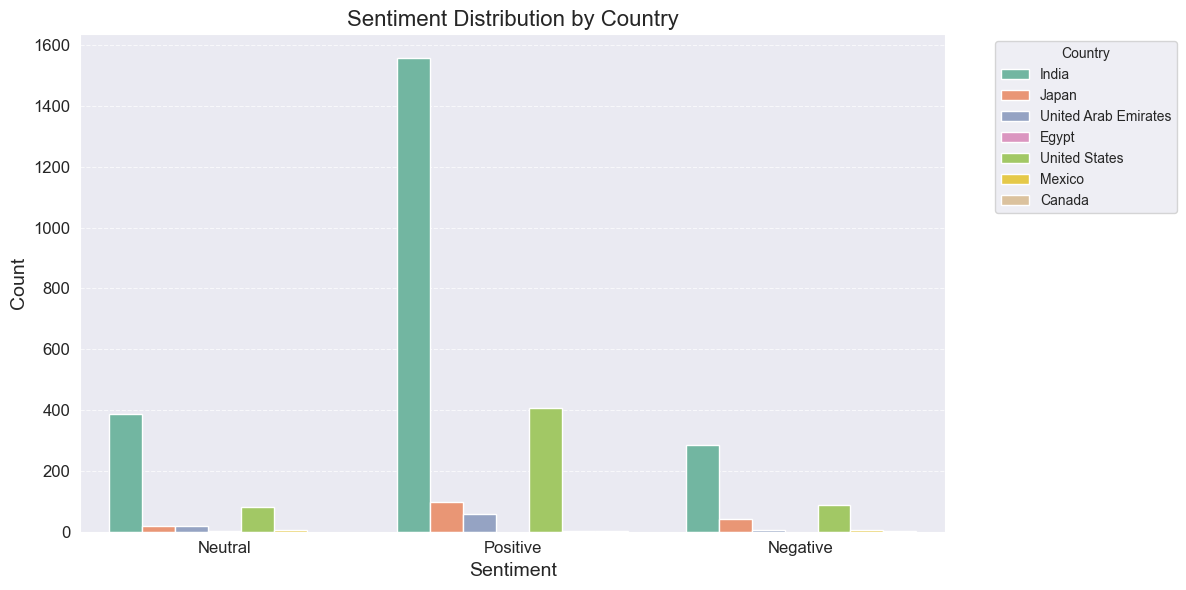

In [16]:
# Visualize the sentiment distribution by country
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment_vader', hue='country', data=df, palette='Set2')
plt.title('Sentiment Distribution by Country', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## using TextBlob Sentiment Analysis


sentiment_textblob
Positive    2148
Neutral      586
Negative     328
Name: count, dtype: int64


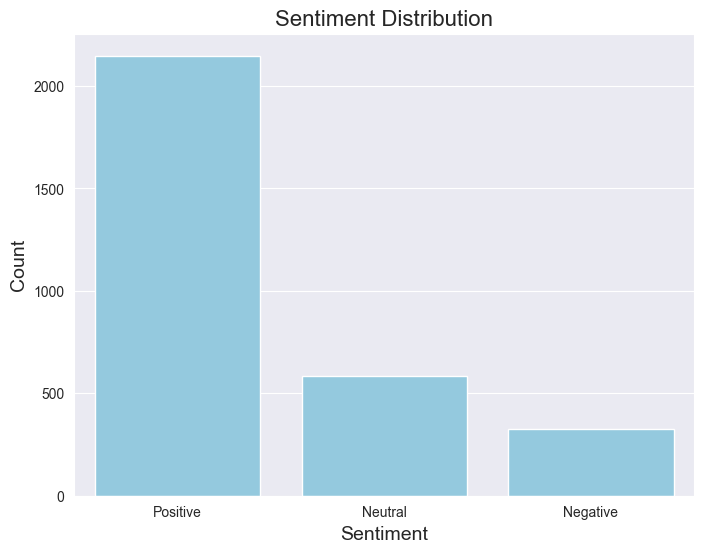

In [17]:
from textblob import TextBlob

# Function to classify sentiments
def classify_sentiment_textblob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
#apply to the cleaned reviewDescription column
df['sentiment_textblob'] = df['cleaned_reviewDescription'].apply(classify_sentiment_textblob)

#Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment_textblob'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, color='skyblue')  # Use a single color
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()


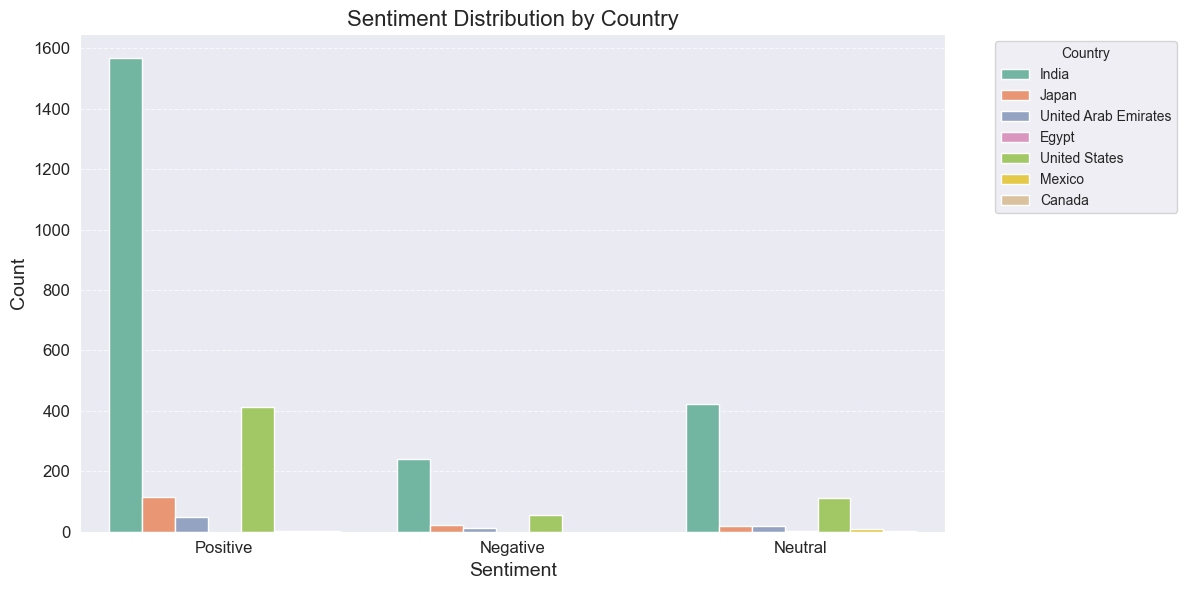

In [18]:
# Visualize the sentiment distribution by country
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment_textblob', hue='country', data=df, palette='Set2')
plt.title('Sentiment Distribution by Country', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## using BERT model from Hugging Face


C:\Users\jibin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\jibin\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solutio

sentiment_bert_v1
very positive    1188
very negative     772
positive          671
neutral           271
negative          160
Name: count, dtype: int64


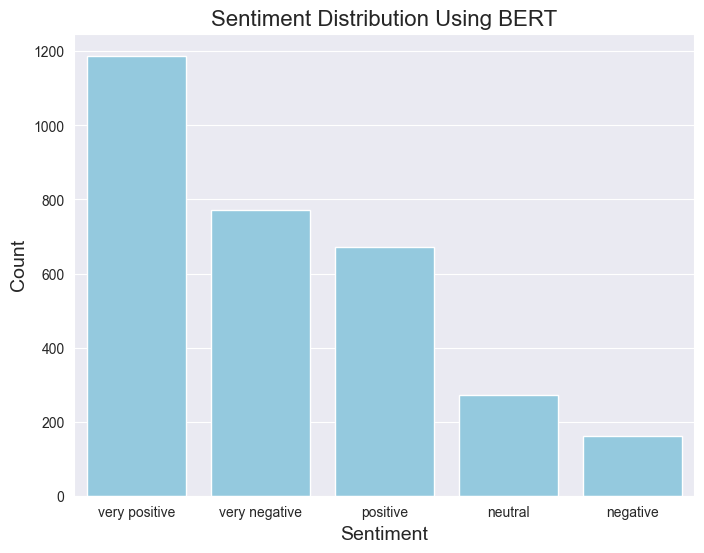

In [19]:
#without mapping to labels
# Import the necessary libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import pandas as pd
#Load the BERT model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)


def classify_sentiment_bert(text):
    # Tokenize and encode the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding=True)
    
    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get predictions and probabilities
    logits = outputs.logits
    probabilities = softmax(logits, dim=-1)
    sentiment = torch.argmax(probabilities).item()
    
    # Return sentiment and confidence
    labels = ["very negative", "negative", "neutral", "positive", "very positive"]
    confidence = probabilities[0][sentiment].item()
    return labels[sentiment], confidence


# Apply the sentiment function to your dataset
df['sentiment_bert_v1'], df['confidence'] = zip(*df['cleaned_reviewDescription'].apply(classify_sentiment_bert))

# Check sentiment counts
sentiment_counts = df['sentiment_bert_v1'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, color='skyblue')
plt.title("Sentiment Distribution Using BERT", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

C:\Users\jibin\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


sentiment_bert_v2
positive    1859
negative     932
neutral      271
Name: count, dtype: int64


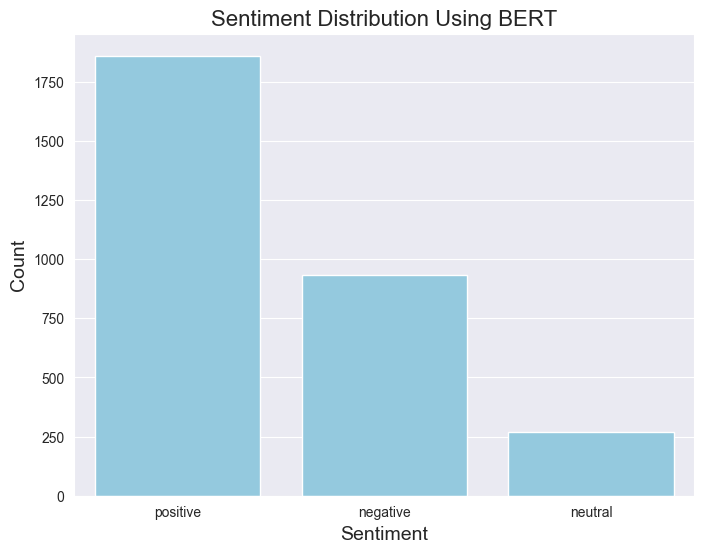

In [20]:
#with mapping to labels
# Import the necessary libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import pandas as pd
#Load the BERT model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)


def classify_sentiment_bert(text):
    # Tokenize and encode the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding=True)
    
    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get predictions and probabilities
    logits = outputs.logits
    probabilities = softmax(logits, dim=-1)
    sentiment_idx = torch.argmax(probabilities).item()
    
    # Return sentiment and confidence
    # nlptown/bert-base-multilingual-uncased-sentiment model has five sentiment categories
    # but for our case, we are interested in only three categories: negative, neutral, and positive to do a easier comparison with Vader and TextBlob
    # so we will map the five categories to three categories
    mapping = {0: "negative", 1: "negative", 2: "neutral", 3: "positive", 4: "positive"}
    sentiment = mapping[sentiment_idx]
    confidence = probabilities[0][sentiment_idx].item()
    
    #we decided to assign sentiment score to a trend visualization
    score_mapping = {"negative": -1, "neutral": 0, "positive": 1}
    sentiment_score = score_mapping[sentiment]
    
    return sentiment, confidence, sentiment_score


# Apply the sentiment function to your dataset
df['sentiment_bert_v2'], df['confidence_mapped'], df['sentiment_score'] = zip(*df['cleaned_reviewDescription'].apply(classify_sentiment_bert))

# Check sentiment counts
sentiment_counts = df['sentiment_bert_v2'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, color='skyblue')
plt.title("Sentiment Distribution Using BERT", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

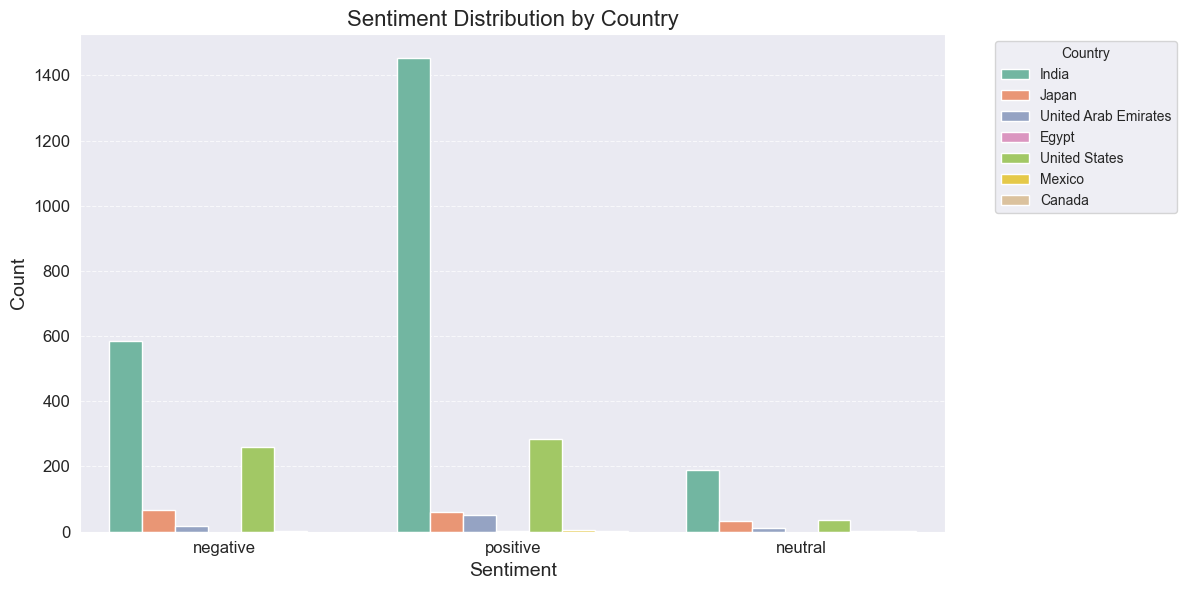

In [21]:
#visualize the sentiment distribution by country for BERT model with mapping to labels
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment_bert_v2', hue='country', data=df, palette='Set2')
plt.title('Sentiment Distribution by Country', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Trend Analysis over time


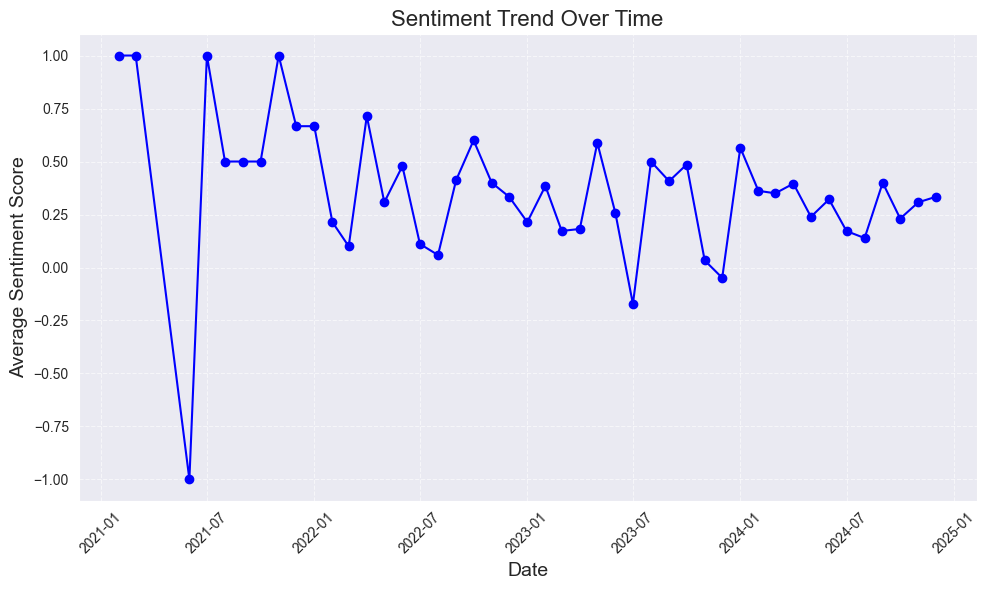

In [22]:
# Convert 'date' column to datetime format if not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by date (month) and calculate the average sentiment score
sentiment_trend = (
    df.groupby(df['date'].dt.to_period('M'))['sentiment_score']
    .mean()
    .reset_index()
)
sentiment_trend['date'] = sentiment_trend['date'].dt.to_timestamp()

# Plot the sentiment trend over time
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trend['date'], sentiment_trend['sentiment_score'], marker='o', linestyle='-', color='b')
plt.title("Sentiment Trend Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Topic Modelling


In [23]:
#Vectorize the text data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfidf = TfidfVectorizer(max_df=0.9, min_df=10, max_features=5000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['cleaned_reviewDescription'])

#apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

#display the topics
for i, topic in enumerate(lda.components_):
    print(f"Top 10 words for Topic #{i}:")
    print([tfidf.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print("\n")

Top 10 words for Topic #0:
['perfect', 'best', 'loved', '13', 'phone', 'features', 'great', 'iphone', 'good', 'product']


Top 10 words for Topic #1:
['buy', 'iphone', 'delivery', 'service', 'value', 'product', 'apple', 'money', 'amazon', 'phone']


Top 10 words for Topic #2:
['superb', 'working', 'amazing', 'battery', 'awesome', 'phone', 'quality', 'camera', 'nice', 'good']


Top 10 words for Topic #3:
['lo', 'excelente', 'overall', '100', 'que', 'muy', 'super', 'la', 'en', 'el']


Top 10 words for Topic #4:
['scratches', 'excellent', 'good', 'condition', 'best', 'like', 'new', 'battery', 'iphone', 'phone']




# Feature Analysis


Average sentiment score for each feature:
camera: 0.34
battery: 0.18
performance: 0.56
price: 0.15
quality: 0.52


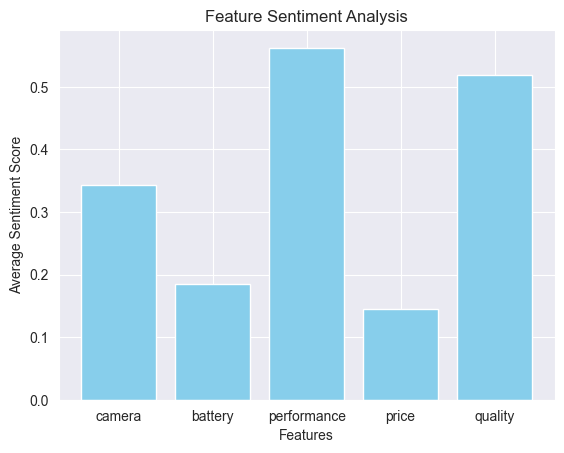

In [7]:
# from wordcloud, we have decided to take 5 features to analyze
# these features are: camera, battery, performance, price, and quality
# goal is to get average sentiment score for each feature

features = ['camera', 'battery', 'performance', 'price', 'quality']
df['cleaned_reviewDescription'] = df['cleaned_reviewDescription'].fillna('').astype(str)
# Create a dictionary to store sentiment scores for each feature
feature_sentiment = {feature: [] for feature in features}

# Populate the dictionary with sentiment scores based on keyword mentions
for index, row in df.iterrows():
    for feature in features:
        if feature in row['cleaned_reviewDescription']:  # Check if the feature is mentioned
            feature_sentiment[feature].append(row['sentiment_score'])

# we have decided to take the score from BERT model with mapping to labels, as we think it is more accurate and good for sentiment analysis
# BERT had taken more negative sentiment than the other two models, we checked them manually and we think it is more accurate
# Calculate the average sentiment score for each feature
feature_sentiment_avg = {
    feature: (sum(scores) / len(scores)) if scores else 0  # Avoid division by zero
    for feature, scores in feature_sentiment.items()
}

# Display the average sentiment scores
print("Average sentiment score for each feature:")
for feature, avg_score in feature_sentiment_avg.items():
    print(f"{feature}: {avg_score:.2f}")

# Create a bar chart for sentiment scores
plt.bar(feature_sentiment_avg.keys(), feature_sentiment_avg.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Average Sentiment Score')
plt.title('Feature Sentiment Analysis')
plt.show()